In [1]:
#https://www.youtube.com/watch?v=hVOuCfJxprI
#https://github.com/letsdata/gradient-boosting-com-xgboost
#https://xgboost.readthedocs.io/en/stable/python/python_api.html
#https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook parâmetros,  mostra os default

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando o xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import xgboost as xgb

In [3]:
import seaborn as sns

In [4]:
df_iris = sns.load_dataset('iris')

In [5]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


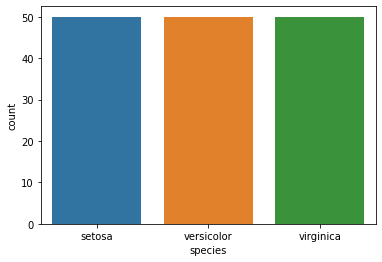

In [6]:
sns.countplot(data=df_iris,
              x='species')

In [7]:
df_iris['species'] = df_iris['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

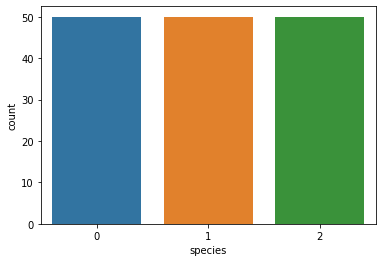

In [8]:
sns.countplot(data=df_iris,
              x='species')

In [9]:
X_iris = df_iris.drop(['species'], axis=1)
y_iris = df_iris['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=42)

In [11]:
#modelo

In [12]:
classificador_xgb = xgb.XGBClassifier()

In [13]:
type(classificador_xgb) #tipo é sklearn

xgboost.sklearn.XGBClassifier

In [14]:
resultado_cv = cross_val_score(classificador_xgb, X_train, y_train)

In [15]:
resultado_cv

array([0.95652174, 0.95652174, 0.86363636, 1.        , 0.95454545])

In [16]:
acuracia_cv = 100 * cross_val_score(classificador_xgb, X_train, y_train).mean()
acuracia_cv

94.62450592885375

In [17]:
clf = xgb.XGBClassifier()
clf.objective #objective é o tipo do motor

'binary:logistic'

In [18]:
clf = xgb.XGBClassifier().fit(X_train, y_train)
clf.objective

'multi:softprob'

In [19]:
#mudar parâmetro, é igual ao sklearn

classificador_xgb_tunado = xgb.XGBClassifier(max_depth=2)

In [20]:
cross_val_score(classificador_xgb_tunado, X_train, y_train).mean()

0.9462450592885375

In [79]:
#mudar parâmetro, é igual ao sklearn

classificador_xgb_dart = xgb.XGBClassifier(booster='dart',
                                           n_estimators=100,
                                           learning_rate=0.01)

In [80]:
cross_val_score(classificador_xgb_dart, X_train, y_train).mean()

0.9636363636363636

In [27]:
#mudar parâmetro, é igual ao sklearn

classificador_xgb_gblinear = xgb.XGBClassifier(booster='gblinear')

In [28]:
cross_val_score(classificador_xgb_gblinear, X_train, y_train).mean()

0.766798418972332

In [81]:
classificador_campeao = classificador_xgb_dart

In [82]:
classificador_campeao.fit(X_train, y_train)

XGBClassifier(booster='dart', learning_rate=0.01, objective='multi:softprob')

In [75]:
dir(classificador_campeao)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_features_count',
 '_get_param_names',
 '_get_tags',
 '_le',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'apply',
 'base_score',
 'booster',
 'classes_',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xgb_params',
 'importance_type',
 'intercept_',
 'kwargs',
 'learning_rate',
 'load_model',
 'max_delta_step',


In [83]:
classificador_campeao.get_params()

{'base_score': 0.5,
 'booster': 'dart',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
'''
regressão
'''

In [66]:
df_mpg = sns.load_dataset('mpg')

In [67]:
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [69]:
X = df_mpg.drop(['mpg', 'origin', 'name'], axis=1)
y = df_mpg['mpg']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [108]:
clf = xgb.XGBRegressor(objective='reg:squarederror')

In [109]:
clf.objective

'reg:squarederror'

In [118]:
regressor_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                                 learning_rate=0.1,
                                 max_depth=4,
                                 booster='dart')
cross_val_score(regressor_xgb, X_train, y_train, scoring='neg_root_mean_squared_error').mean()

-3.013653525582908

In [119]:


regressor_xgb.fit(X,y)

XGBRegressor(booster='dart', max_depth=4, objective='reg:squarederror')

In [120]:
regressor_xgb.get_params()

{'base_score': 0.5,
 'booster': 'dart',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [122]:
preds = regressor_xgb.predict(X_test)

In [123]:
preds

array([32.83786 , 29.66386 , 20.062943, 15.262547, 13.744707, 26.725227,
       26.501734, 12.666011, 16.721216, 20.135149, 14.491414, 36.333496,
       27.304276, 14.833085, 24.954445, 12.323734, 30.737404, 18.25479 ,
       16.10788 , 33.672054, 22.374968, 20.661463, 22.65212 , 30.884071,
       16.869947, 43.370247, 24.70742 , 23.813494, 18.855864, 12.425224,
       26.451195, 34.937675, 20.342445, 24.532894, 37.479313, 14.721247,
       21.191793, 18.240755, 14.665522, 27.431702, 26.321077, 27.397945,
       19.753796, 10.64867 , 22.750309, 35.152767, 25.845728, 23.86386 ,
       24.393576, 25.87441 , 21.917912, 34.0953  , 33.034   , 13.235827,
       25.01103 , 13.460936, 17.289507, 28.861032, 25.175722, 19.5994  ,
       12.601792, 32.488853, 23.567577, 20.131878, 20.309103, 25.313692,
       22.881716, 34.690365, 24.912231, 14.01139 , 35.0456  , 14.509623,
       14.380985, 18.51316 , 24.734692, 19.580328, 18.397795, 28.638264,
       28.987837, 17.885365, 16.17957 , 27.193865, 